https://public.tableau.com/app/profile/nadia.nabilla.shafira/viz/HistRating/Nadia_Nabilla?publish=yes
https://public.tableau.com/app/profile/nadia.nabilla.shafira/viz/HistRating/Dashboard5?publish=yes

Nama        : Nadia Nabilla Shafira

Batch       : HCK-009

## Identifikasi Masalah

- Specific    : mengetahui bagaimana preferensi user terhadap aplikasi yang tersedia di google play store.
- Measurable  : aplikasi berhasil diinstalls oleh 3 juta users.
- Achieveable : mengetahui perilaku user terhadap aplikasi, serta mendapat informasi general dari dataset google play store.
- Relevant    : mengetahui perilaku user terhadap aplikasi di google play store dapat menjadi dasar strategi dalam meraih banyaknya installs sesuai target.
- Time-Bound  : dapat menyusun strategi bisnis sesuai informasi yang diperoleh di minggu ini.


Problem Statement:

Tujuan dari analisis ini yaitu untuk mengetahui preferensi user terhadap aplikasi yang tersedia di google play store sehingga dapat meraih banyaknya installs minimal 3 juta users.

Latar Belakang:

Untuk launch suatu aplikasi di Google Play Store, diperlukan consumer insight analysis. Perlu diketahui aplikasi seperti apa yang diminati oleh android user. Dengan demikian, kami dapat menyusun strategi serta mengembangkan aplikasi yang sesuai dengan minat user.

Penjabaran Masalah
- Bagaimana karakteristik data yang dimiliki?
- Apa 10 kategori yg paling banyak diinstall?
- Apa 10 kategori yg rata-rata ratingnya tertinggi?
- Bagaimana proporsi content rating yg install aplikasi berkategori paling banyak diinstall?
- Berapa potensi banyaknya installs jika launch aplikasi berkategori paling banyak diinstall?
- Bagaimana perbandingan banyaknya aplikasi yang berbayar dan aplikasi yang gratis?
- Apakah user lebih menyukai aplikasi yg gratis atau berbayar?

## Data Loading

Data yang digunakan merupakan data google play store yang diperoleh dari kaggle (https://www.kaggle.com/datasets/arnikaer/googleplaystore). Untuk memuat dataset di python, diperlukan package bernama pandas. Data loading dilakukan dengan syntax berikut:

In [2]:
import pandas as pd

In [12]:
df = pd.read_csv("googleplaystore.csv")
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Output di atas menunjukkan 3 data teratas dari dataset google play store.

## Data Exploration

Pada bagian ini, akan dilakukan data exploration untuk mendapatkan informasi dari dataset ini secara general.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Di dalam dataset google play store, terdapat 10,841 entries dan 13 kolom. Adapun tipe data dari masing-masing kolom didominasi oleh tipe data object, kecuali kolom rating yang bertipe data float.

## Data Cleaning

Dataset google play store perlu dilakukan preprocessing berupa data cleaning, agar dapat dianalisis lebih lanjut.

Pada proses Data Cleaning, kolom yang tidak diperlukan dalam proses analisis akan dihapus. Kemudian simbol '$' pada kolom 'Price' akan dihapuskan, sehingga tipe data dari kolom ini akan berubah menjadi Float. Selain itu, simbol '+' dan juga thousand separator pada kolom 'Installs' akan dihilangkan dengan maksud yang sama seperti pada kolom 'Price'. Kemudian, akan dilakukan pengecekan missing values dan data duplicates serta penanganannya jika terbukti terdapat missing values dan/atau data duplicates.

1. Menghapus kolom yang tidak digunakan

Pada tahap ini, beberapa kolom akan dihapuskan mengingat analisis yang akan dilakukan seputar mengetahui preferensi user dalam menginstall aplikasi. Oleh karena itu, kolom 'Reviews' akan dihapus karena sudah diwakilkan oleh kolom 'Rating, kemudian kolom 'Genre' juga akan dihapus karena memiliki peran yang sama dengan kolom 'Category'. Untuk kolom lainnya seperti 'Size', 'Last Updated', 'Current Ver', dan 'Android Ver' juga akan dihapus karena tidak memiliki peran yang relevan dengan tujuan analisis.

In [14]:
del df['Reviews']
del df['Size']
del df['Genres']
del df['Last Updated']
del df['Current Ver']
del df['Android Ver']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Installs        10841 non-null  object 
 4   Type            10840 non-null  object 
 5   Price           10841 non-null  object 
 6   Content Rating  10840 non-null  object 
dtypes: float64(1), object(6)
memory usage: 593.0+ KB


Berdasarkan output di atas, dapat dilihat bahwa kolom yang ingin dihapus sudah tidak ada, dan sekarang banyaknya kolom pada dataset google play store menjadi 7. Selanjutnya akan dilihat apakah terdapat missing values pada dataset ini.

2. Menghapus simbol '$', '+', ','(thousand separator), mengganti '_' menjadi ' ', serta mengubah upper case menjadi title case di kolom kategori

In [15]:
df['Price'] = df['Price'].str.replace('$', '')          #menghilangkan simbol $ pada kolom Price
df['Price'] = df['Price'].str.strip()                   #menghilangkan simbol $ pada kolom Price
df['Installs'] = df['Installs'].str.replace('+', '')    #menghilangkan simbol + pada kolom Installs
df['Installs'] = df['Installs'].str.replace(',', '')    #menghilangkan thousand separator pada kolom Installs
df['Category'] = df['Category'].str.replace('_', ' ')   #mengganti _ menjadi spasi
df['Category'] = df['Category'].str.title()             #mengganti upper case menjadi title case
df.head(1)

C:\Users\Nadia Nabilla\AppData\Local\Temp\ipykernel_29496\2804059831.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')          #menghilangkan simbol $ pada kolom Price
C:\Users\Nadia Nabilla\AppData\Local\Temp\ipykernel_29496\2804059831.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')    #menghilangkan simbol + pada kolom Installs


,App,Category,Rating,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,10000,Free,0,Everyone


Seperti yang terlihat pada output di atas, sudah tidak lagi terdapat simbol $ pada kolom Price, serta simbol + dan thousand separator pada kolom Installs. Sehingga, selanjutnya tipe datanya akan disesuaikan kembali.

3. Mengubah tipe data

In [17]:
df['Price'] = df['Price'].astype(float)
df['Installs'] = df['Installs'].astype(int)

ValueError: could not convert string to float: 'Everyone'

Ketika ingin mengubah tipe data Kolom Price dari object menjadi float, terjadi error karena terdapat entries berupa string, yaitu 'Everyone'. Sehingga, baris tersebut akan dihapus.

In [18]:
df = df[~(df['Price']=='Everyone')]

In [29]:
df['Price'] = df['Price'].astype(float)
df['Installs'] = df['Installs'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Installs        10840 non-null  int32  
 4   Type            10839 non-null  object 
 5   Price           10840 non-null  float64
 6   Content Rating  10840 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 635.2+ KB


Berdasarkan output di atas, dapat dilihat bahwa tipe data dari masing-masing kolom sudah sesuai dan banyaknya entries menjadi 10,840.

4. Identifikasi dan Menangani Misisng Values

In [30]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Installs             0
Type                 1
Price                0
Content Rating       0
dtype: int64

Pada Kolom 'Rating' terdapat sebanyak 1474 missing values dari 10,840 entries (13.6% dari data), sedangkan pada kolom 'Type' hanya terdapat 1 missing value

Missing values yang terdapat pada kolom 'Rating' dan 'Type' akan dihapus karena untuk variabel 'Type' tidak dapat diketahui informasi lebih lanjut jika ingin menempatkan nilai lain, dan juga persentase perbandingan missing values pada kolom tersebut juga sangat kecil. Sedangkan untuk kolom 'Rating', rows yang mengandung missing values juga akan dihapuskan karena mengingat terdapat kemungkinan bahwa missing values terjadi karena beberapa aplikasi yang memang belum memiliki penilaian dari user.

In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Installs        9366 non-null   int32  
 4   Type            9366 non-null   object 
 5   Price           9366 non-null   float64
 6   Content Rating  9366 non-null   object 
dtypes: float64(2), int32(1), object(4)
memory usage: 548.8+ KB


Berdasarkan output di atas, banyaknya entries pada dataset google play store menjadi 9,366 data.

5. Identifikasi Data Duplicates

In [32]:
df.duplicated().sum()

1075

Pada dataset google play store, terdapat 1075 data duplicates. Untuk mengetahui lebih lanjut apakah benar terdapat data duplicates, maka akan dilihat data yang terindikasi data duplicates.

In [33]:
df[df.duplicated()]

,App,Category,Rating,Installs,Type,Price,Content Rating
229,Quick PDF Scanner + OCR FREE,Business,4.2,5000000,Free,0.0,Everyone
236,Box,Business,4.2,10000000,Free,0.0,Everyone
239,Google My Business,Business,4.4,5000000,Free,0.0,Everyone
256,ZOOM Cloud Meetings,Business,4.4,10000000,Free,0.0,Everyone
261,join.me - Simple Meetings,Business,4.0,1000000,Free,0.0,Everyone
...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,Dating,3.0,100000,Free,0.0,Mature 17+
10720,Firefox Focus: The privacy browser,Communication,4.4,1000000,Free,0.0,Everyone
10730,FP Notebook,Medical,4.5,50000,Free,0.0,Everyone
10753,Slickdeals: Coupons & Shopping,Shopping,4.5,1000000,Free,0.0,Everyone


Seperti yang terlihat pada output di atas, bahwa ternyata tidak terdapat data duplicates pada dataset google play store.

Berikut merupakan informasi dari data google play store setelah dilakukan data cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Installs        9366 non-null   int32  
 4   Type            9366 non-null   object 
 5   Price           9366 non-null   float64
 6   Content Rating  9366 non-null   object 
dtypes: float64(2), int32(1), object(4)
memory usage: 548.8+ KB


Data yang telah dibersihkan memiliki 7 kolom dan 9,366 entries.

In [52]:
#menyimpan data yang telah dibersihkan ke dalam bentuk csv.
df.to_csv('data.csv', index = False)
print("Berhasil disimpan")

Berhasil disimpan


## Analisis dan Perhitungan

In [53]:
import matplotlib.pyplot as plt
import plotly.express as px

In [54]:
df = pd.read_csv('data.csv')

### Karakteristik Data

Agar mendapatkan hasil analisis yang tidak bias, perlu diketahui karakteristik datanya terlebih dahulu dengan melihat penyebaran data,identifikasi distribusi dari data yang akan dianalisis, serta mendeteksi ada atau tidaknya outliers.

a. Melihat Ukuran Pemusatan Dan Penyebaran Data

In [55]:
#mencari nilai rata-rata, median, dan standard deviasi dari 'Rating'
print(f"Mean Rating: {df['Rating'].mean()}")                            #mencari nilai rata-rata dari kolom 'Rating'
print(f"Median Rating: {df['Rating'].median()}")                        #mencari nilai median dari kolom 'Rating'
print(f"Std. deviasi Rating: {df['Rating'].std()}\n")                   #mencari nilai standard deviasi dari kolom 'Rating'

#mencari nilai rata-rata, median, dan standard deviasi dari kolom 'Installs'
print(f"Mean Installs: {df['Installs'].mean()}")                        #mencari nilai rata-rata dari kolom 'Installs'
print(f"Median Installs: {df['Installs'].median()}")                    #mencari nilai median dari kolom 'Installs'
print(f"Std. deviasi Installs: {df['Installs'].std()}\n")               #mencari nilai standard deviasi dari kolom 'Installs'

Mean Rating: 4.191757420456972
Median Rating: 4.3
Std. deviasi Rating: 0.5152188586177868

Mean Installs: 17897443.726030324
Median Installs: 500000.0
Std. deviasi Installs: 91238217.3771704



Pada kolom 'Rating', diperoleh rata-rata sebesar 4.1918, artinya rating aplikasi di google play store diwakili oleh 4.1918.
Selain itu, diperoleh median sebesar 4.3, artinya nilai tengah dari data rating sebesar 4.3.
Adapun standard deviasi/simpangan baku dari data rating yaitu sebesar 0.515, artinya data menyebar sejauh 0.515 dari rata-rata.

Pada kolom 'Installs', diperoleh rata-rata sebesar 17,897,443.7260, artinya data installs diwakili oleh 17,897,443.7260 installs.
Selain itu, diperoleh median sebesar 500,000, artinya nilai tengah dari data installs sebesar 500,000.
Adapun standard deviasi/simpangan baku dari data installs yaitu sebesar 91,238,217.3772, artinya data menyebar sejauh 91,238,217.3772 dari rata-rata.

Dengan melihat nilai mean, median, dan standard deviasi dari kedua kolom tersebut, terdapat indikasi outlier pada kolom 'Installs' karena nilai mean jauh dari mediannya dan juga standard deviasinya tinggi.

b. Melihat Kemiringan dan Keruncingan Distribusi Data

In [56]:
#skewness dan kurtosis kolom 'Rating'
print(f"Skewness Rating: {df['Rating'].skew()}")                        #mencari nilai skewness dari kolom 'Rating'
print(f"Kurtosis Rating: {df['Rating'].kurtosis()}\n")                  #mencari nilai kurtosis dari kolom 'Rating'

#skewness dan kurtosis kolom 'Installs'
print(f"Skewness Installs: {df['Installs'].skew()}")                    #mencari nilai skewness dari kolom 'Installs'
print(f"Kurtosis Installs: {df['Installs'].kurtosis()}\n")              #mencari nilai kurtosis dari kolom 'Installs'

Skewness Rating: -1.8496951283704521
Kurtosis Rating: 5.7869240668056

Skewness Installs: 8.888325357143831
Kurtosis Installs: 86.22555008193139



Pada kolom 'Rating' diperoleh skewness sebesar -1.8497 dan kurtosis sebesar 5.7869, artinya bentuk distribusi data rating miring negatif dan memiliki kurva leptokurtik.

Pada kolom 'Installs' diperoleh skewness sebesar 8.8883 dan kurtosis sebesar 86.2256, artinya bentuk distribusi data installs miring positif dan memiliki kurva leptokurtik.

c. Mendeteksi dan Penanganan Outliers

- Kolom 'Rating'

<Axes: >

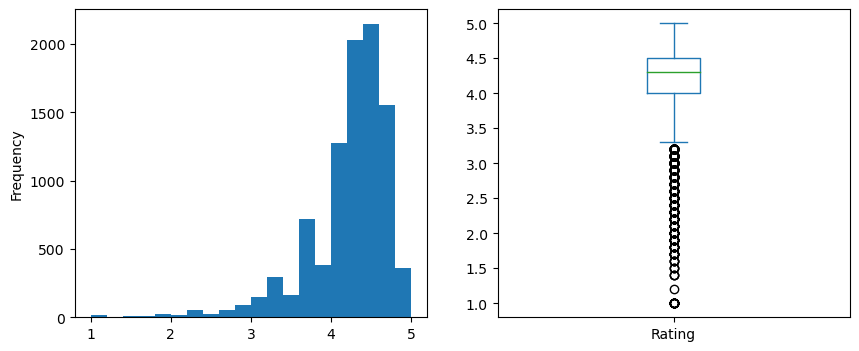

In [57]:
#mendeteksi outliers pada kolom 'Rating'
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['Rating'].plot(kind='hist',bins=20,ax=ax[0])
df['Rating'].plot(kind='box',ax=ax[1])

Berdasarkan histogram dari kolom rating, dapat dilihat bahwa data dari kolom rating banyak menyebar di angka 4 hingga 5, sehingga hasil skewness beserta kurtosis dari kolom rating pun dapat divalidasi bahwa kolom rating berdistribusi miring negatif dengan kurva leptokurtik. Selain itu, berdasarkan boxplot dari kolom rating, dapat dilihat bahwa terdapat banyak outliers di bawah lower bound. Oleh karena itu, outliers akan ditangani dengan metode Tukey's Rule.

<Axes: >

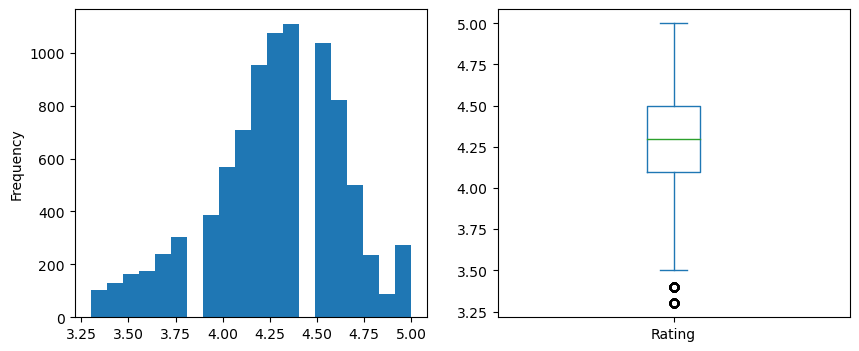

In [58]:
q1R = df['Rating'].quantile(0.25)           #menghitung kuartil bawah
q3R = df['Rating'].quantile(0.75)           #menghitung kuartil atas
iqrR = q3R-q1R                              #menghitung IQR, di mana IQR = Q3-Q1

upper_boundR = q3R + 1.5*iqrR               #menghitung upper bound
lower_boundR = q1R - 1.5*iqrR               #menghitung lower bound

no_outlierR = df['Rating'][(df['Rating']>=lower_boundR) & (df['Rating']<=upper_boundR)]   #menentukan data yang bukan outlier,  di mana data tersebut berada di antara di antara lower dan upper bound

#membuat histogram dan boxplot dari data yang tidak terdapat outlier
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
no_outlierR.plot(kind='hist',bins=20,ax=ax[0])
no_outlierR.plot(kind='box',ax=ax[1])

Berdasarkan boxplot di atas, banyaknya outlier sudah berkurang. Walaupun masih terdapat outlier, namun pada tahap ini cukup dilakukan satu kali penanganan. 

- Kolom 'Installs'

<Axes: >

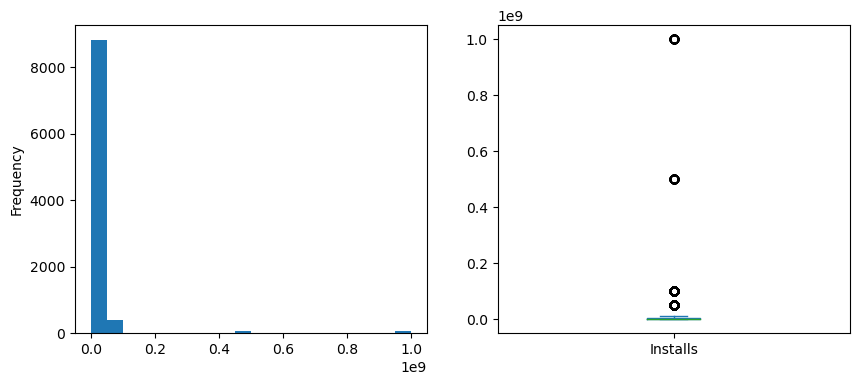

In [59]:
#mendeteksi outliers pada kolom 'Installs'
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['Installs'].plot(kind='hist',bins=20,ax=ax[0])
df['Installs'].plot(kind='box',ax=ax[1])

Berdasarkan histogram dari kolom installs, dapat dilihat bahwa data dari kolom installs banyak menyebar di angka 0.0 hingga 0.1, sehingga hasil skewness beserta kurtosis dari kolom installs pun dapat divalidasi bahwa kolom rating berdistribusi miring positif dengan kurva leptokurtik. Selain itu, berdasarkan boxplot dari kolom installs, dapat dilihat bahwa terdapat banyak outliers di atas upper bound. Oleh karena itu, outliers akan ditangani dengan metode Tukey's Rule.

<Axes: >

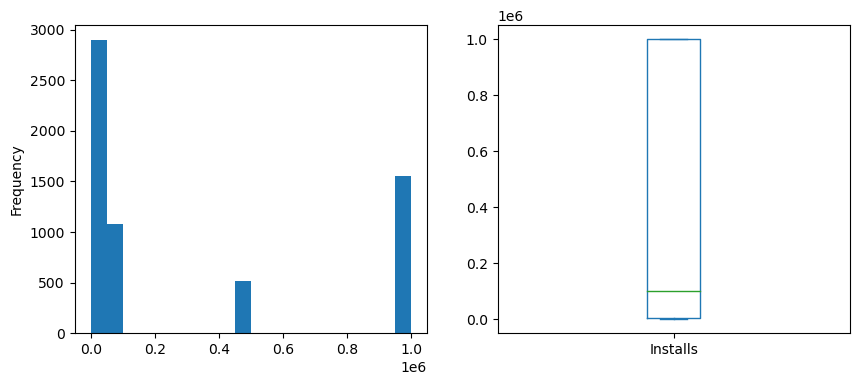

In [95]:
q1I = df['Installs'].quantile(0.25)         #menghitung kuartil bawah
q3I = df['Installs'].quantile(0.75)         #menghitung kuartil atas
iqrI = q3I-q1I                              #menghitung IQR, di mana IQR = Q3-Q1

upper_boundI = q3I + 1.5*iqrI               #menghitung upper bound
lower_boundI = q1I - 1.5*iqrI               #menghitung lower bound

no_outlierI = df['Installs'][(df['Installs']>=lower_boundI) & (df['Installs']<=upper_boundI)]   #menentukan data yang bukan outlier,  di mana data tersebut berada di antara di antara lower dan upper bound

#membuat histogram dan boxplot dari data yang tidak terdapat outlier
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
no_outlierI.plot(kind='hist',bins=20,ax=ax[0])
no_outlierI.plot(kind='box',ax=ax[1])

Berdasarkan boxplot di atas, banyaknya outlier sudah berkurang. Walaupun masih terdapat outlier, namun pada tahap ini cukup dilakukan satu kali penanganan. 

In [61]:
df['Rating'] = no_outlierR
df['Installs'] = no_outlierI
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8036 entries, 0 to 9365
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8036 non-null   object 
 1   Category        8036 non-null   object 
 2   Rating          8036 non-null   float64
 3   Installs        8036 non-null   float64
 4   Type            8036 non-null   object 
 5   Price           8036 non-null   float64
 6   Content Rating  8036 non-null   object 
dtypes: float64(3), object(4)
memory usage: 502.2+ KB


Dapat dilihat bahwa banyaknya entries menjadi 8,036. Kemudian akan dilihat bagaimana ukuran pemusatan dan penyebaran data dari kolom 'Rating' dan 'Installs' setelah outliers dibuang

In [97]:
#mencari nilai rata-rata, median, dan standard deviasi dari 'Rating' setelah outlier dibuang
print(f"Mean Rating: {df['Rating'].mean()}")                            #mencari nilai rata-rata dari kolom 'Rating'
print(f"Median Rating: {df['Rating'].median()}")                        #mencari nilai median dari kolom 'Rating'
print(f"Std. deviasi Rating: {df['Rating'].std()}\n")                   #mencari nilai standard deviasi dari kolom 'Rating'

#mencari nilai rata-rata, median, dan standard deviasi dari kolom 'Installs' setelah outlier dibuang
print(f"Mean Installs: {df['Installs'].mean()}")                        #mencari nilai rata-rata dari kolom 'Installs'
print(f"Median Installs: {df['Installs'].median()}")                    #mencari nilai median dari kolom 'Installs'
print(f"Std. deviasi Installs: {df['Installs'].std()}\n")               #mencari nilai standard deviasi dari kolom 'Installs'

Mean Rating: 4.267309606769537
Median Rating: 4.3
Std. deviasi Rating: 0.36926106163037115

Mean Installs: 2256104.1541811847
Median Installs: 500000.0
Std. deviasi Installs: 3599745.729467375



Setelah dilakukan penanganan outliers, diperoleh rata-rata dari kolom rating yaitu 4.27, dan rata-rata dari kolom installs yaitu 2,256,104.15

Selanjutnya data yang sudah melalui proses penanganan outliers akan disimpan ke dalam bentuk .csv dengan nama file 'nadia_nabilla.csv'.

In [62]:
df.to_csv('nadia_nabilla.csv', index = False)
print("Berhasil disimpan")

Berhasil disimpan


In [63]:
df = pd.read_csv('nadia_nabilla.csv')

### 10 Kategori Aplikasi yang Paling Banyak Diinstall

Category
Game                  2.980405e+09
Family                2.726343e+09
Tools                 1.164358e+09
Photography           9.354049e+08
Sports                8.458684e+08
Shopping              7.972194e+08
Communication         7.469854e+08
Health And Fitness    7.320750e+08
Social                6.697634e+08
Productivity          6.593105e+08
Name: Installs, dtype: float64


<Axes: ylabel='Category'>

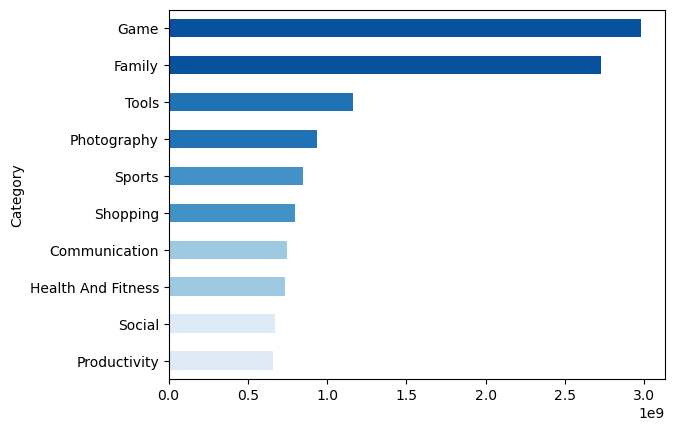

In [68]:
catCount = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)    #menghitung jumlah banyaknya installs berdasarkan kategori, kemudian diurutkan dari yang terbanyak
print(catCount.head(10))      

colors1 = ['#deebf7', '#deebf7', '#9ecae1','#9ecae1', '#4292c6',
           '#4292c6', '#2171b5', '#2171b5', '#08519c', '#08519c']                   #membuat list warna                                                      #menampilkan 10 kategori dengan jumlah installs terbanyak
catCount.head(10).sort_values(ascending=True).plot(kind='barh',color=colors1)       #menampilkan bar chart

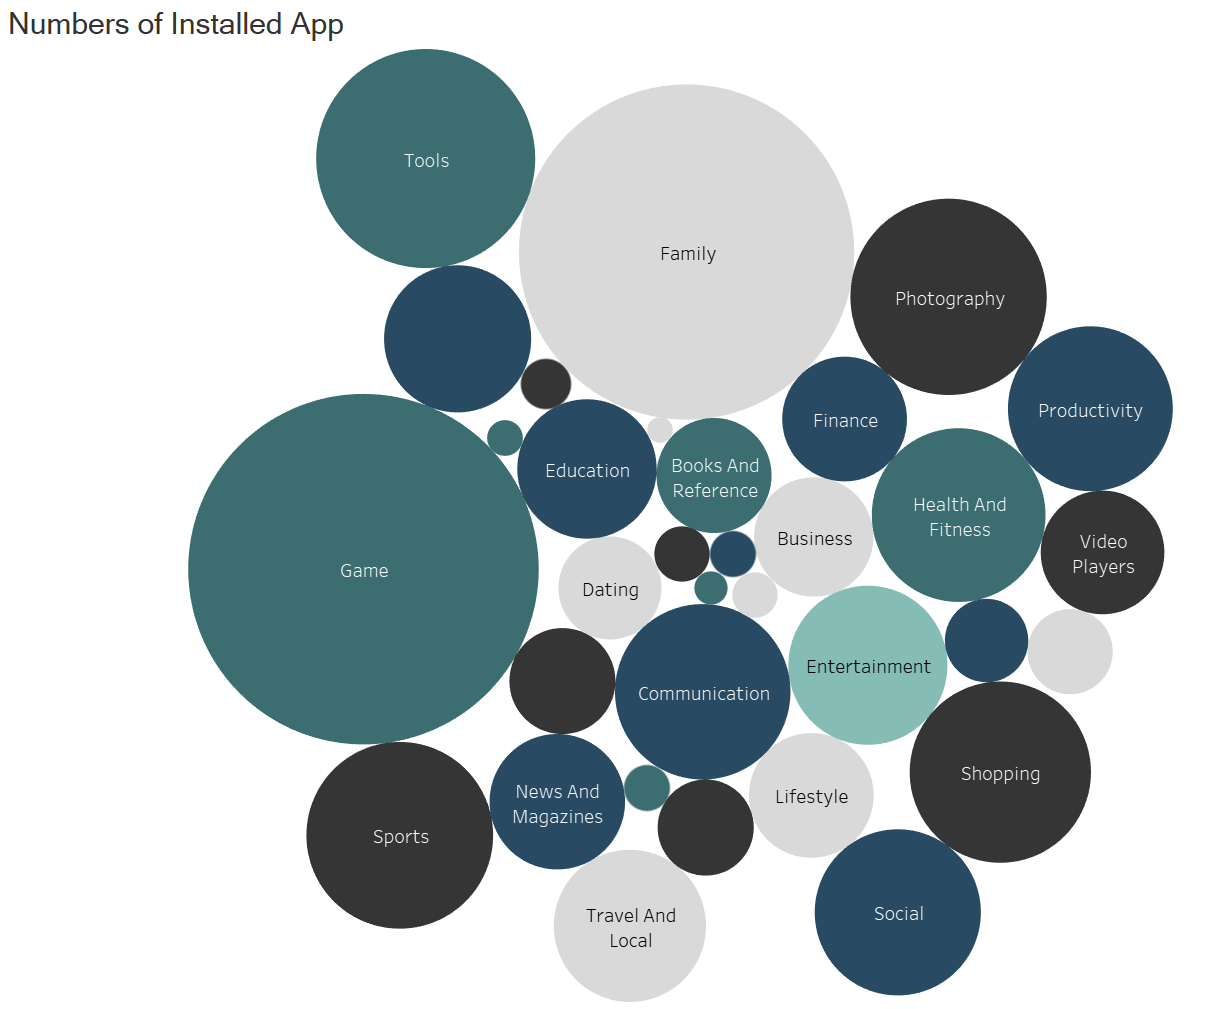

Berdasarkan bar chart di atas, dapat dilihat bahwa aplikasi dengan kategori 'Game' merupakan aplikasi yang paling banyak diinstall, yaitu sebanyak 2.9 miliar. Sedangkan, pada 10 data teratas, aplikasi dengan kategori 'Productivity' merupakan aplikasi yang paling sedikit diinstall (659 juta).

### 10 Kategori Aplikasi dengan Rata-rata Rating Tertinggi

Category
Events                 4.470455
Health And Fitness     4.416045
Education              4.380795
Art And Design         4.375000
Parenting              4.372917
Books And Reference    4.368452
Personalization        4.345296
Medical                4.344375
Auto And Vehicles      4.308955
Beauty                 4.307317
Name: Rating, dtype: float64


<Axes: xlabel='Category'>

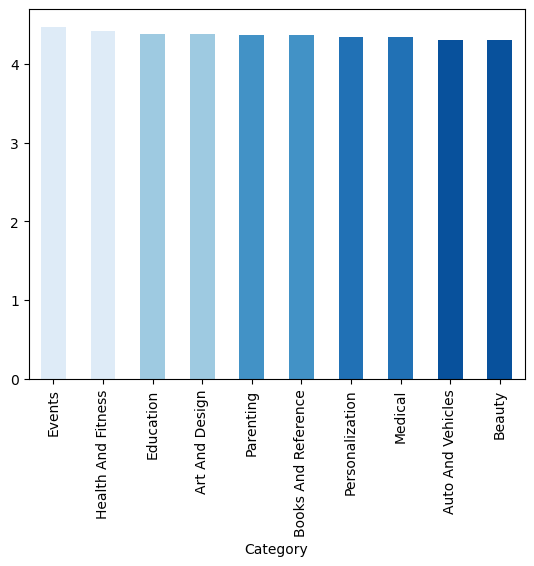

In [69]:
meanRating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)   #menghitung rata-rata rating berdasarkan kategori, kemudian diurutkan dari yang tertinggi ke terendah
print(meanRating.head(10))
meanRating.head(10).plot(kind='bar', color=colors1)                                 #menampilkan bar chart 

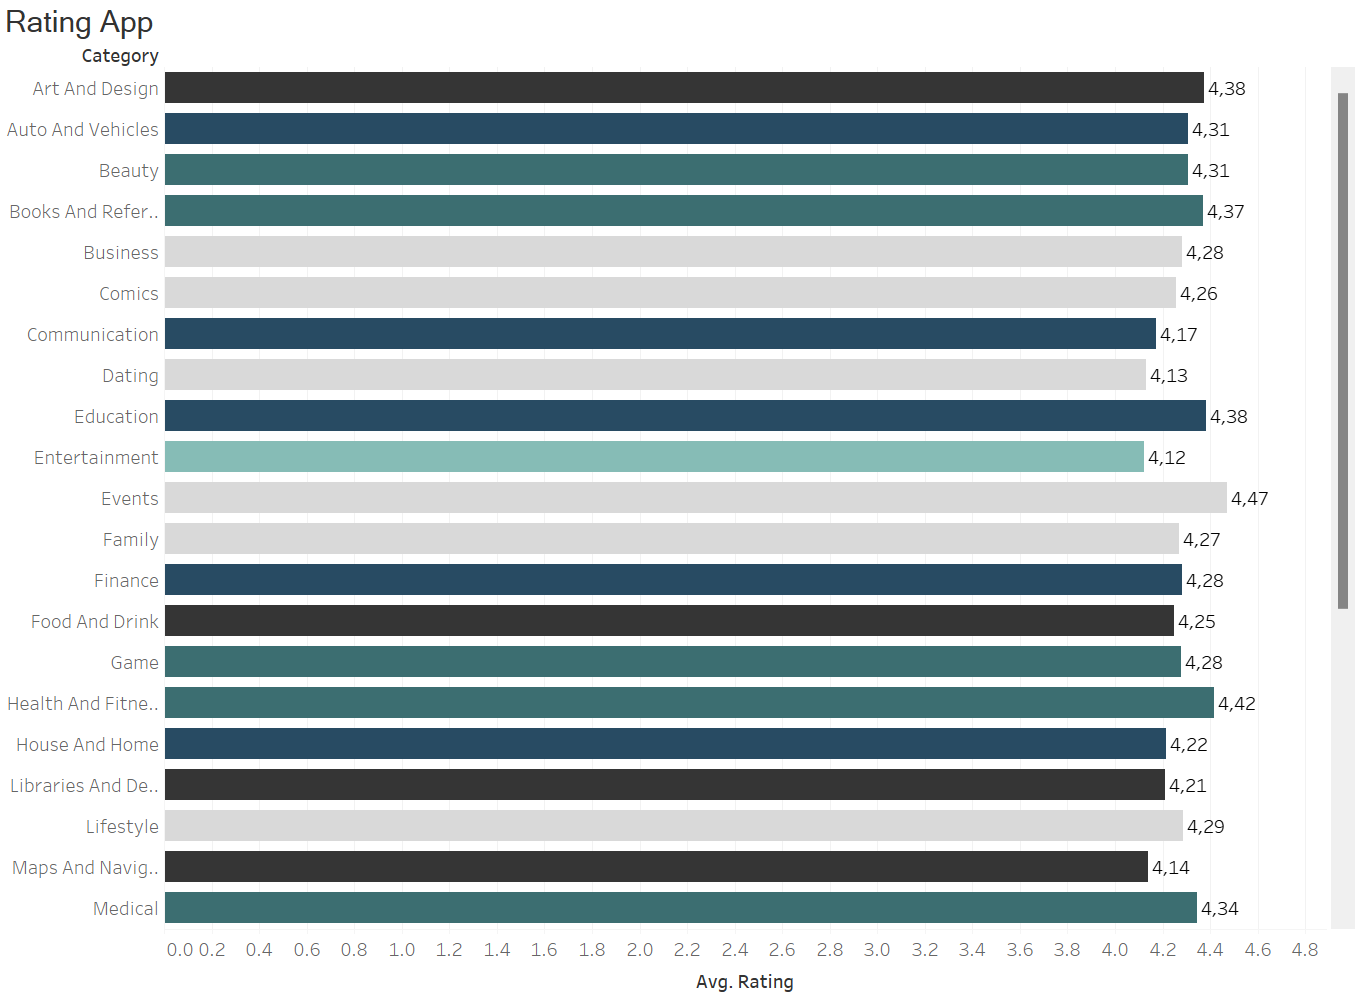

Pada 10 kategori dengan rating tertinggi, aplikasi dengan kategori 'Events' merupakan aplikasi yang mendapat rata-rata rating tertinggi, yaitu 4.47. Sedangkan kategori aplikasi yang mendapat rata-rata rating terendah yaitu 'Beauty'.

### Proporsi Content Rating pada Aplikasi Berkategori Paling Banyak Diinstall

In [70]:
game = df[df['Category'] == 'Game']                 #extract kategori 'Game'
print(f"total game app: {len(game)}")               #menghitung banyaknya aplikasi game
crCounts = game['Content Rating'].value_counts()    #menghitung tiap-tiap content rating yang install aplikasi berkategori game
crCounts

total game app: 841


Everyone        414
Teen            274
Everyone 10+     89
Mature 17+       64
Name: Content Rating, dtype: int64

In [71]:
values = [414, 274, 89, 64]                                     #membuat list values
keys = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+']       #membuat list keys
colors2 = ['#C6DBEF', '#9ECAE1', '#4292C6','#2171B5']           #membuat list warna untuk donut chart

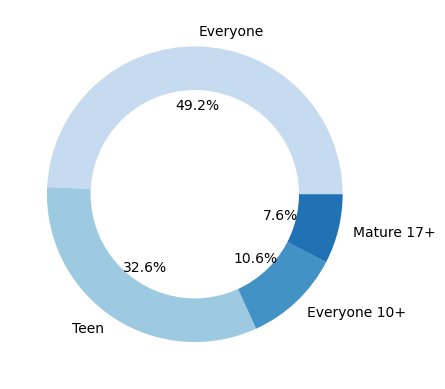

In [99]:
circle = plt.Circle((0,0), 0.7,color='white')        #membuat circle putih di tengah agar chart terlihat seperti donat
plt.pie(crCounts, labels = keys, colors=colors2, autopct='%1.1f%%')     #membuat pie chart
#membuat donut chart
p = plt.gcf()
p.gca().add_artist(circle)

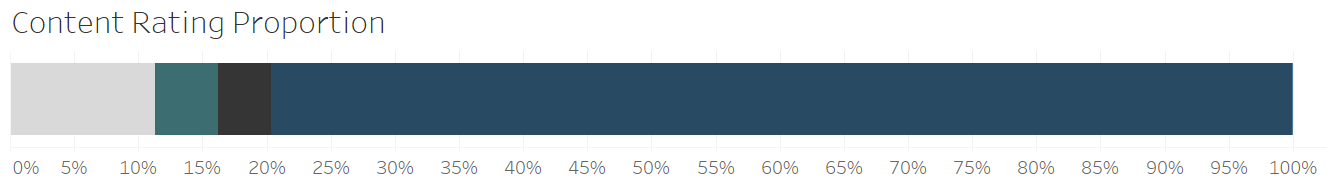

Setelahnya sebelumnya diketahui bahwa aplikasi dengan kategori 'Game' merupakan yang paling banyak diinstall, didapatkan juga informasi bahwa banyaknya aplikasi game pada data google play store sebanyak 841. Dari 841 aplikasi, sebanyak 414 aplikasi diperuntukkan kepada semua usia, 274 aplikasi untuk remaja berusia 13 tahun ke atas, 89 aplikasi untuk user yang berusia di atas 9 tahun, dan 64 aplikasi diklasifikasikan sebagai aplikasi untuk user yang berusia 17 tahun ke atas.

### Potensi Banyaknya Installs Jika Launch Aplikasi Berkategori Paling Banyak Diinstall

In [73]:
from scipy import stats
import numpy as np

In [74]:
std = game['Installs'].std()                                        #menghitung std. deviasi utk digunakan dalam perhitungan CI
mean = game['Installs'].mean()
n = len(df)                                                         #menghitung banyaknya data
low, up = stats.norm.interval(0.95,loc=mean,scale=std/np.sqrt(n))   #menghitung lower dan upper values dengan confidence level 95%
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 3452355.4890111666
Upper Limit: 3635409.593034018


Jika diputuskan membuat dan meluncurkan aplikasi dengan kategori 'Game', diperkirakan akan diinstall sebanyak antara 3,452,355 hingga 3,635,409 kali.

### Perbandingan Banyaknya Aplikasi Berbayar dan Aplikasi Gratis

In [75]:
df['Type'].unique()         #melihat label yang menandai 'berbayar' dan 'gratis'

array(['Free', 'Paid'], dtype=object)

Aplikasi yang gratis dilabeli 'Free', sedangkan aplikasi yang berbayar dilabeli 'Paid'.

In [76]:
free = df[df['Type'] == 'Free']         #extract value 'Free'
paid = df[df['Type'] == 'Paid']         #extract value 'Paid'

print(f"total free app: {len(free)}")   #menghitung banyaknya aplikasi gratis
print(f"total paid app: {len(paid)}")   #menghitung banyaknya aplikasi berbayar

total free app: 7425
total paid app: 611


Banyaknya aplikasi yang gratis pada google play store yaitu sebanyak 7,425. Sedangkan aplikasi yang berbayar terdapat 611.

([<matplotlib.patches.Wedge at 0x2f1246c0690>,
 [Text(-1.0687680307552698, 0.2602592869342083, 'Free'),
  Text(1.0687680124798424, -0.26025936198317157, 'Paid')],
 [Text(-0.5829643804119653, 0.1419596110550227, '92.4%'),
  Text(0.5829643704435504, -0.14195965199082083, '7.6%')])

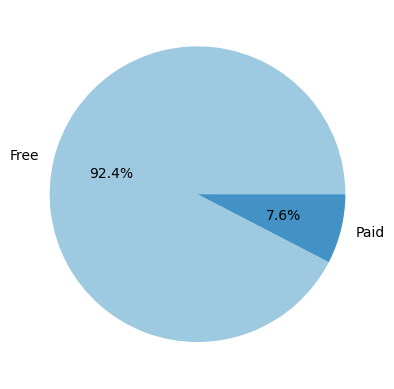

In [77]:
#membuat pie chart
valuesPrice = [7425, 611]                                                       #membuat list values
keysPrice = ['Free', 'Paid']                                                    #membuat list keys
colors3 = ['#9ECAE1', '#4292C6']                                                #membuat list warna untuk pie chart
plt.pie(valuesPrice, labels = keysPrice, colors=colors3, autopct='%1.1f%%')     #membuat pie chart

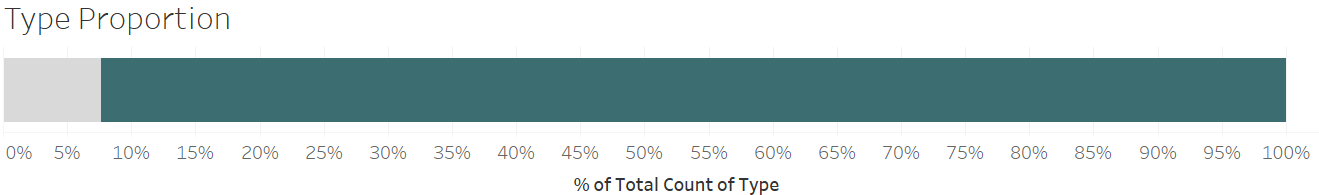

Seperti yang terlihat pada pie chart di atas, 92.4% aplikasi yang ada di google play store merupakan free app, sedangkan 7.6% lainnya aplikasi berbayar.

### Melihat preferensi user terhadap aplikasi gratis dan berbayar

Untuk melihat apakah user lebih menyukai aplikasi yang gratis atau berbayar dapat dilihat dengan korelasi antara harga aplikasi dengan banyaknya aplikasi diinstall dan korelasi antara harga aplikasi dengan rating aplikasi.

In [78]:
import seaborn as sns

a. Korelasi antara Harga Aplikasi dan Banyaknya Aplikasi Terinstall

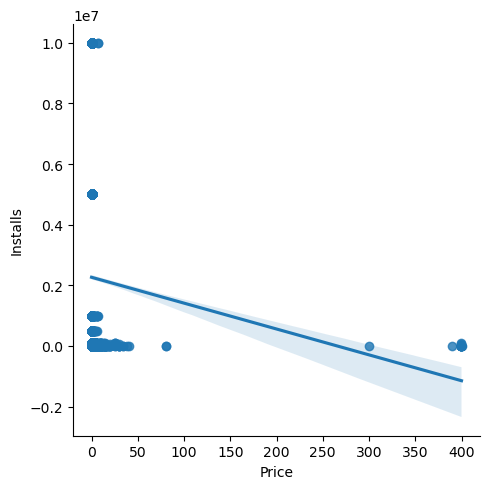

In [79]:
sns.lmplot(data=df,x='Price', y='Installs')             #melihat scatter plot antara variabel 'Price' dan 'Installs'

Berdasarkan scatter plot di atas, dapat dilihat bahwa harga aplikasi dan banyaknya aplikasi diinstall berkorelasi negatif. Namun perlu diketahui apakah kedua variabel tersebut berkorelasi secara signifikan atau tidak dengan menghitung koefisien korelasi dengan metode rank spearman karena data memiliki skewed distributions.

H0  : harga aplikasi dan banyaknya aplikasi diinstall tidak berkorelasi

H1  : harga aplikasi dan banyaknya aplikasi diinstall berkorelasi

In [88]:
corr_rho1, pval_s1 = stats.spearmanr(df['Price'], df['Installs'])       #menghitung korelasi spearman
print(f"rho-correlation: {corr_rho1:.2f}, \np-value: {pval_s1}")

rho-correlation: -0.27, 
p-value: 2.4421828732982943e-137


Berdasarkan output di atas, diperoleh p-value = 2.4422 x 10^(-137) dan koefisien korelasi r = -0.27, sehingga H0 ditolak. Artinya harga aplikasi dan banyaknya aplikasi terinstall secara signifikan berkorelasi. Selain itu, koefisien korelasi menunjukkan bahwa kedua variabel tersebut berkorelasi negatif, artinya semakin tinggi harga aplikasi, maka banyaknya aplikasi yang terinstall semakin sedikit, begitu juga sebaliknya.

b. Korelasi antara Harga Aplikasi dan Rating Aplikasi

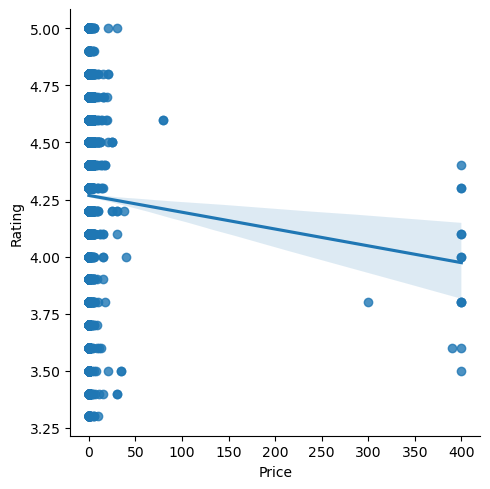

In [89]:
sns.lmplot(data=df,x='Price', y='Rating')               #melihat scatter plot antara variabel 'Price' dan 'Rating'

Berdasarkan scatter plot di atas, dapat dilihat bahwa harga aplikasi dan rating aplikasi berkorelasi negatif. Namun perlu diketahui apakah kedua variabel tersebut berkorelasi secara signifikan atau tidak dengan menghitung koefisien korelasi dengan metode rank spearman karena data memiliki skewed distributions.

In [91]:
corr_rho2, pval_s2 = stats.spearmanr(df['Price'], df['Rating'])       #menghitung korelasi spearman
print(f"rho-correlation: {corr_rho2:.2f}, p-value: {pval_s2}")

rho-correlation: 0.08, p-value: 1.6302413374209446e-13


Berdasarkan output di atas, diperoleh p-value = 1.6302 x 10^(-13) dan koefisien korelasi r = 0.08, artinya harga aplikasi dan rating aplikasi secara signifikan berkorelasi. Selain itu, koefisien korelasi menunjukkan bahwa kedua variabel tersebut berkorelasi positif, artinya semakin tinggi harga aplikasi, maka rating aplikasi juga semakin tinggi.

## Kesimpulan

Berdasarkan analisis yang telah dilakukan, setelah outliers ditangani, data rating dari aplikasi yang tersedia di google play store memiliki distribusi miring negatif, dimana data banyak menyebar di antara angka 4.00 hingga 4.75 dengan rata-rata 4.27. Sedangkan data banyaknya jumlah installs memiliki distribusi miring positif dengan rata-rata sebesar 2,256,104.15.

Setelah melakukan beberapa analisis, diperoleh bahwa aplikasi berkategori **Game merupakan yang paling banyak diinstall**, namun yang mendapat **rata-rata rating tertinggi adalah kategori 'Events'**.

Dengan informasi bahwa kategori Game merupakan kategori yang paling banyak diisntall, diketahui bahwa dari 841 aplikasi Game, sebanyak 414 aplikasi diperuntukkan kepada semua usia, 274 aplikasi untuk remaja berusia 13 tahun ke atas, 89 aplikasi untuk user yang berusia di atas 9 tahun, dan 64 aplikasi diklasifikasikan sebagai aplikasi untuk user yang berusia 17 tahun ke atas.

Dengan hasil analisis tersebut, application developer semakin terarah untuk mengembangkan aplikasi berkategori Game. Dan jika developer meluncurkan aplikasi berkategori Game, diperkirakan aplikasi tersebut akan diinstalls sebanyak antara 3,452,355 hingga 3,635,409.

Setelah diputuskan untuk mengembangkan aplikasi berkategori Game, selanjutnya akan ditentukan apakah aplikasi tersebut akan berbayar atau tidak. Dari 8,036 aplikasi yang tersedia di google play store, 92.4% di antaranya merupakan aplikasi yang dapat diakses secara gratis, sedangkan sisanya merupakan aplikasi berbayar.

Adapun preferensi user terhadap tipe aplikasi adalah sebagai berikut:

- Semakin tinggi harga aplikasi, maka banyaknya user yang menginstall aplikasi semakin sedikit, dan sebaliknya.
- Semakin tinggi harga aplikasi, maka rating aplikasi juga semakin tinggi.

Sehingga, kami memutuskan untuk mengembangkan aplikasi tidak berbayar berkategori 'Game' dengan content rating semua usia.